In [1]:
## First I imported important libraries that I will be using in further data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## I stored walmart sales data in a python variable named sales_data
sales_data = pd.read_excel("walmart_sales_data.xlsx")
sales_data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,A,Naypyitaw,Normal,Male,Health and beauty,40.35,1,1/29/2019,13:46:00,Ewallet,6.2
996,303-96-2227,A,Mandalay,Normal,Female,Home and lifestyle,97.38,10,3/2/2019,17:16:00,Ewallet,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,2/9/2019,13:22:00,Cash,7.7
998,347-56-2442,B,Yangon,Normal,Male,Home and lifestyle,65.82,1,2/22/2019,15:33:00,Cash,4.1


In [4]:
## Now I checked for any missing values col vise and count if any
null_values = sales_data.isnull().sum()
print(null_values)

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64


In [5]:
## I just run this to check datatypes of each column
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  Rating         1000 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


In [6]:
## I observed all cols datatypes are correct except time and date col, so I converted date and time col to datetime format
sales_data['Date'] = pd.to_datetime(sales_data['Date'], format='%m/%d/%Y')
sales_data['Time'] = pd.to_datetime(sales_data['Time'], format='%H:%M:%S')

In [7]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice ID     1000 non-null   object        
 1   Branch         1000 non-null   object        
 2   City           1000 non-null   object        
 3   Customer type  1000 non-null   object        
 4   Gender         1000 non-null   object        
 5   Product line   1000 non-null   object        
 6   Unit price     1000 non-null   float64       
 7   Quantity       1000 non-null   int64         
 8   Date           1000 non-null   datetime64[ns]
 9   Time           1000 non-null   datetime64[ns]
 10  Payment        1000 non-null   object        
 11  Rating         1000 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 93.9+ KB


In [8]:
## I used to get statistics of my data
sales_data.describe()

,Unit price,Quantity,Date,Time,Rating
count,1000.000000,1000.000000,1000,1000,1000.00000
mean,55.672130,5.510000,2019-02-14 00:05:45.600000,1900-01-01 15:24:41.879999744,6.97270
min,10.080000,1.000000,2019-01-01 00:00:00,1900-01-01 10:00:00,4.00000
25%,32.875000,3.000000,2019-01-24 00:00:00,1900-01-01 12:43:00,5.50000
50%,55.230000,5.000000,2019-02-13 00:00:00,1900-01-01 15:19:00,7.00000
75%,77.935000,8.000000,2019-03-08 00:00:00,1900-01-01 18:15:00,8.50000
max,99.960000,10.000000,2019-03-30 00:00:00,1900-01-01 20:59:00,10.00000
std,26.494628,2.923431,NaN,NaN,1.71858


**CALCULATING SALES AND REVENUE FROM GIVEN DATA**

In [9]:
## Calculating sales and revenue
sales_data['Sales'] = sales_data['Quantity'] * sales_data['Unit price']
sales_data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Sales
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,2019-01-05,1900-01-01 13:08:00,Ewallet,9.1,522.83
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,2019-03-08,1900-01-01 10:29:00,Cash,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,2019-03-03,1900-01-01 13:23:00,Credit card,7.4,324.31
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,2019-01-27,1900-01-01 20:33:00,Ewallet,8.4,465.76
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2019-02-08,1900-01-01 10:37:00,Ewallet,5.3,604.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,A,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2019-01-29,1900-01-01 13:46:00,Ewallet,6.2,40.35
996,303-96-2227,A,Mandalay,Normal,Female,Home and lifestyle,97.38,10,2019-03-02,1900-01-01 17:16:00,Ewallet,4.4,973.80
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,2019-02-09,1900-01-01 13:22:00,Cash,7.7,31.84
998,347-56-2442,B,Yangon,Normal,Male,Home and lifestyle,65.82,1,2019-02-22,1900-01-01 15:33:00,Cash,4.1,65.82


In [10]:
## taking assumption of 10% discount on sales for calculating revenue
discount_percentage = 0.10
sales_data['Revenue'] = sales_data['Sales'] * (1-discount_percentage)
sales_data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Sales,Revenue
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,2019-01-05,1900-01-01 13:08:00,Ewallet,9.1,522.83,470.547
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,2019-03-08,1900-01-01 10:29:00,Cash,9.6,76.40,68.760
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,2019-03-03,1900-01-01 13:23:00,Credit card,7.4,324.31,291.879
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,2019-01-27,1900-01-01 20:33:00,Ewallet,8.4,465.76,419.184
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2019-02-08,1900-01-01 10:37:00,Ewallet,5.3,604.17,543.753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,A,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2019-01-29,1900-01-01 13:46:00,Ewallet,6.2,40.35,36.315
996,303-96-2227,A,Mandalay,Normal,Female,Home and lifestyle,97.38,10,2019-03-02,1900-01-01 17:16:00,Ewallet,4.4,973.80,876.420
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,2019-02-09,1900-01-01 13:22:00,Cash,7.7,31.84,28.656
998,347-56-2442,B,Yangon,Normal,Male,Home and lifestyle,65.82,1,2019-02-22,1900-01-01 15:33:00,Cash,4.1,65.82,59.238


**Analyze the performance of sales and revenue at the city and branch level**

In [11]:
## grouped by city and further branch
grouped_sales_data = sales_data.groupby(['City', 'Branch']).agg({'Quantity': 'sum','Sales':'sum', 'Revenue':'sum'}).reset_index()
grouped_sales_data

,City,Branch,Quantity,Sales,Revenue
0,Mandalay,A,637,34130.09,30717.081
1,Mandalay,B,664,37215.93,33494.337
2,Mandalay,C,519,29794.62,26815.158
3,Naypyitaw,A,648,35985.64,32387.076
4,Naypyitaw,B,604,35157.75,31641.975
5,Naypyitaw,C,579,34160.14,30744.126
6,Yangon,A,598,33647.27,30282.543
7,Yangon,B,631,35193.51,31674.159
8,Yangon,C,630,32302.43,29072.187


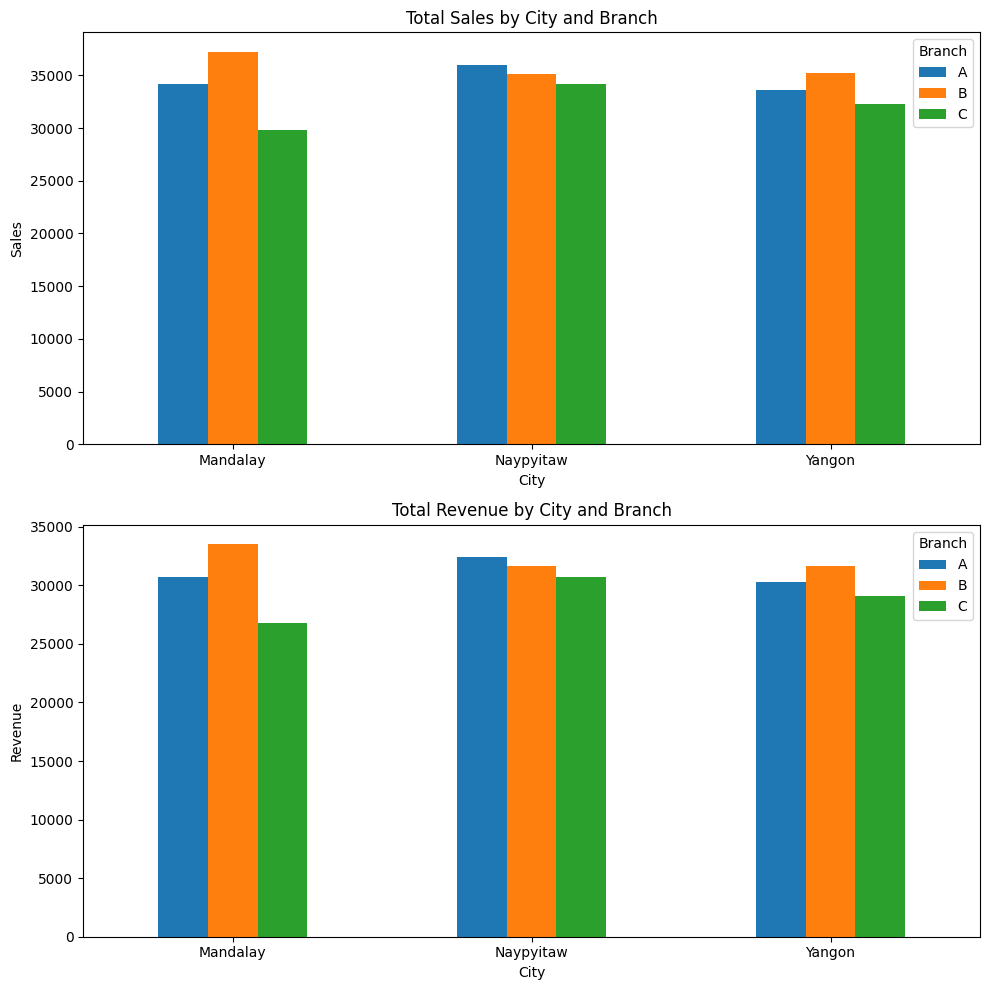

In [12]:
# Created a bar plot for Sales and Revenue by City and Branch
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

grouped_sales_data.pivot(index='City', columns='Branch', values='Sales').plot(kind='bar', ax=ax[0], title='Total Sales by City and Branch')
ax[0].set_ylabel('Sales')
ax[0].set_xlabel('City')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0)

grouped_sales_data.pivot(index='City', columns='Branch', values='Revenue').plot(kind='bar', ax=ax[1], title='Total Revenue by City and Branch')
ax[1].set_ylabel('Revenue')
ax[1].set_xlabel('City')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0)

plt.tight_layout()

plt.show()

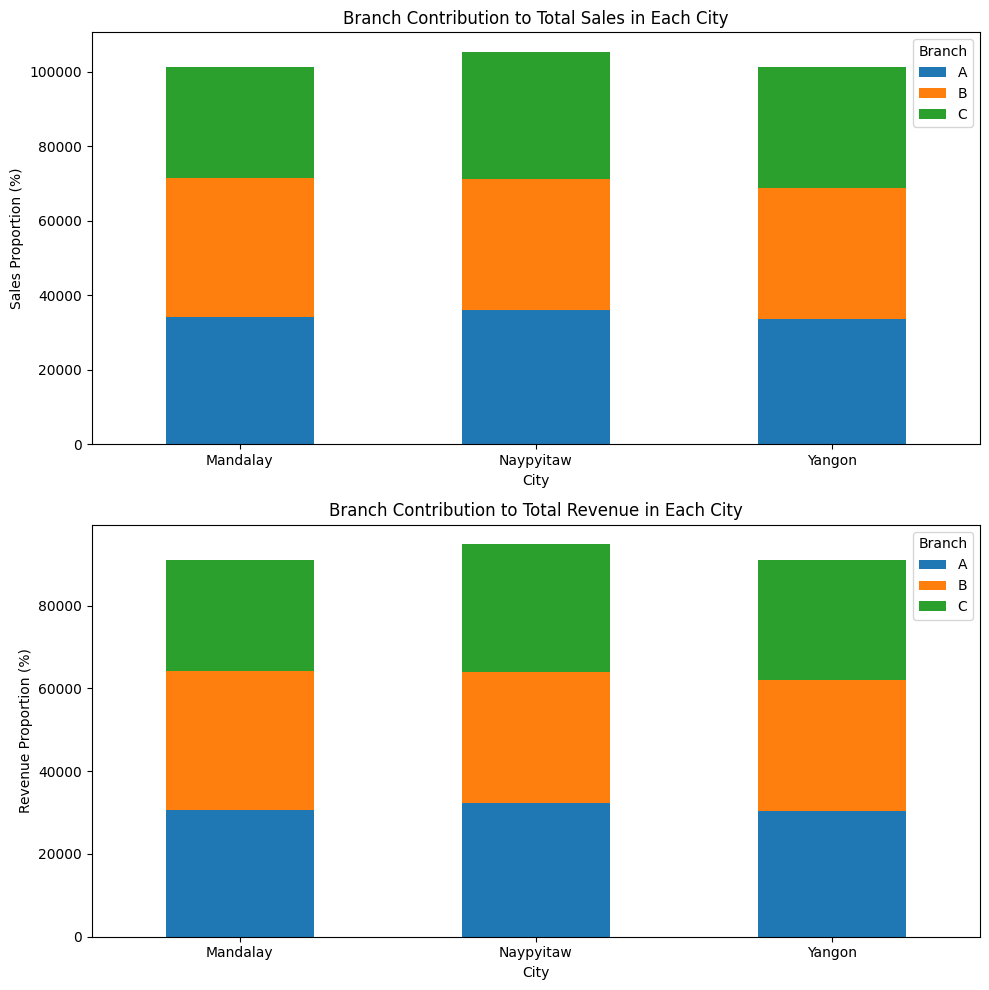

In [13]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

grouped_sales_data.pivot(index='City', columns='Branch', values='Sales').plot(kind='bar', stacked=True, ax=ax[0], title='Branch Contribution to Total Sales in Each City')
ax[0].set_ylabel('Sales Proportion (%)')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0)

grouped_sales_data.pivot(index='City', columns='Branch', values='Revenue').plot(kind='bar', stacked=True, ax=ax[1], title='Branch Contribution to Total Revenue in Each City')
ax[1].set_ylabel('Revenue Proportion (%)')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

**Average price of an item sold at each branch of the city**

In [14]:
## I aggregated quantity across each branch in each city because I wanted to calculate avergae order value across each bracnh each city
grouped_sales_data_aov = sales_data.groupby(['City', 'Branch']).agg({'Quantity': 'sum','Sales':'sum', 'Revenue':'sum'}).reset_index()
grouped_sales_data_aov

,City,Branch,Quantity,Sales,Revenue
0,Mandalay,A,637,34130.09,30717.081
1,Mandalay,B,664,37215.93,33494.337
2,Mandalay,C,519,29794.62,26815.158
3,Naypyitaw,A,648,35985.64,32387.076
4,Naypyitaw,B,604,35157.75,31641.975
5,Naypyitaw,C,579,34160.14,30744.126
6,Yangon,A,598,33647.27,30282.543
7,Yangon,B,631,35193.51,31674.159
8,Yangon,C,630,32302.43,29072.187


In [15]:
## I calculated average order value across each branch in each city and added a column named 'average order value'
grouped_sales_data_aov['Average order value'] = grouped_sales_data_aov['Sales'] / grouped_sales_data_aov['Quantity']
grouped_sales_data_aov

,City,Branch,Quantity,Sales,Revenue,Average order value
0,Mandalay,A,637,34130.09,30717.081,53.579419
1,Mandalay,B,664,37215.93,33494.337,56.048087
2,Mandalay,C,519,29794.62,26815.158,57.407746
3,Naypyitaw,A,648,35985.64,32387.076,55.533395
4,Naypyitaw,B,604,35157.75,31641.975,58.208195
5,Naypyitaw,C,579,34160.14,30744.126,58.998515
6,Yangon,A,598,33647.27,30282.543,56.266338
7,Yangon,B,631,35193.51,31674.159,55.774184
8,Yangon,C,630,32302.43,29072.187,51.273698


**Analyze the performance of sales and revenue, Month over Month across the Product line, Gender, and Payment Method**

In [18]:
## Here I group by month and productline to analyze sales and revenue month by month for each productline
sales_data['Month'] = sales_data['Date'].dt.to_period('M')
grouped_data_bymonth_productline = sales_data.groupby(['Month', 'Product line']).agg({'Sales':'sum', 'Revenue':'sum'}).reset_index()

In [19]:
grouped_data_bymonth_productline.head(2000)

,Month,Product line,Sales,Revenue
0,2019-01,Electronic accessories,17934.56,16141.104
1,2019-01,Fashion accessories,18423.92,16581.528
2,2019-01,Food and beverages,18638.60,16774.740
3,2019-01,Health and beauty,15603.02,14042.718
4,2019-01,Home and lifestyle,19518.80,17566.920
5,2019-01,Sports and travel,20635.26,18571.734
6,2019-02,Electronic accessories,16536.10,14882.490
7,2019-02,Fashion accessories,18104.63,16294.167
8,2019-02,Food and beverages,19047.96,17143.164
9,2019-02,Health and beauty,13906.91,12516.219


In [20]:
grouped_data_bymonth_productline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype    
---  ------        --------------  -----    
 0   Month         18 non-null     period[M]
 1   Product line  18 non-null     object   
 2   Sales         18 non-null     float64  
 3   Revenue       18 non-null     float64  
dtypes: float64(2), object(1), period[M](1)
memory usage: 704.0+ bytes


In [22]:
grouped_data_bymonth_productline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype    
---  ------        --------------  -----    
 0   Month         18 non-null     period[M]
 1   Product line  18 non-null     object   
 2   Sales         18 non-null     float64  
 3   Revenue       18 non-null     float64  
dtypes: float64(2), object(1), period[M](1)
memory usage: 704.0+ bytes


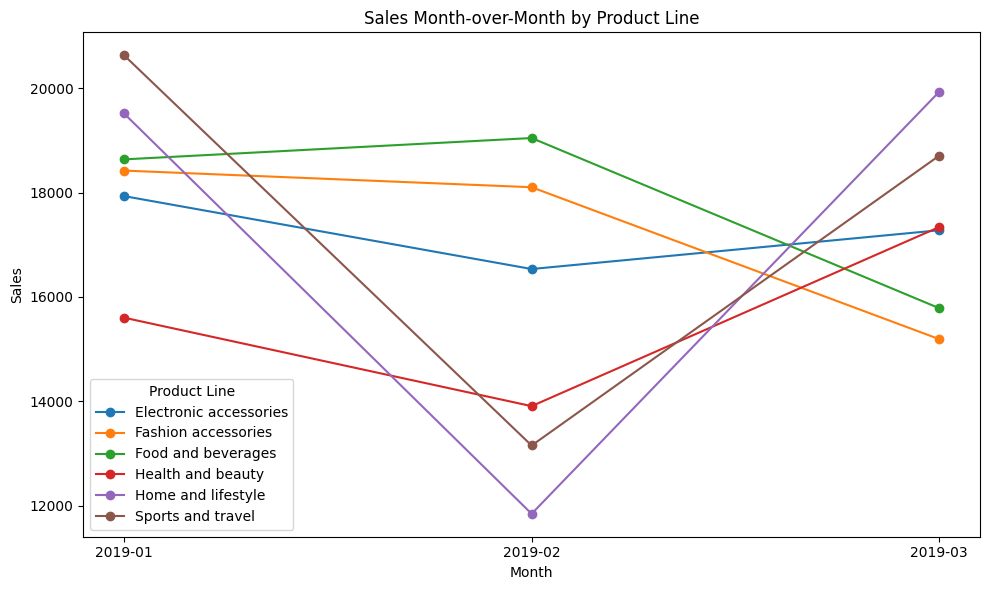

In [34]:
plt.figure(figsize=(10, 6))
for product_line in grouped_data_bymonth_productline['Product line'].unique():
    product_sales = grouped_data_bymonth_productline[grouped_data_bymonth_productline['Product line'] == product_line]
    plt.plot(product_sales['Month'].astype(str), product_sales['Sales'], label=product_line, marker='o')

plt.title('Sales Month-over-Month by Product Line')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Product Line')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

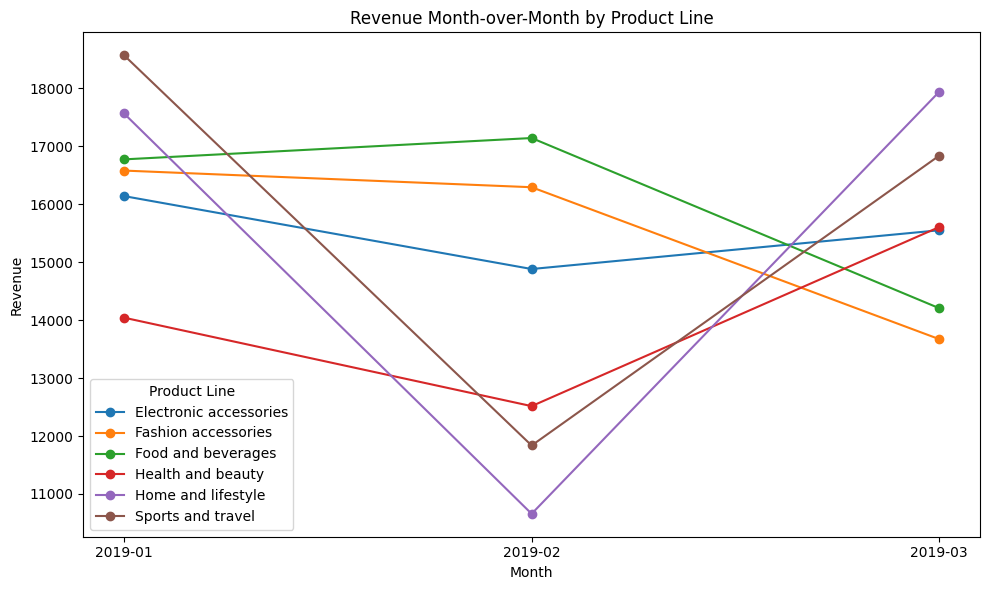

In [35]:
plt.figure(figsize=(10, 6))
for product_line in grouped_data_bymonth_productline['Product line'].unique():
    product_revenue = grouped_data_bymonth_productline[grouped_data_bymonth_productline['Product line'] == product_line]
    plt.plot(product_sales['Month'].astype(str), product_revenue['Revenue'], label=product_line, marker='o')

plt.title('Revenue Month-over-Month by Product Line')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend(title='Product Line')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [26]:
grouped_data_bymonth_gender = sales_data.groupby(['Month', 'Gender']).agg({'Sales':'sum', 'Revenue':'sum'}).reset_index()
grouped_data_bymonth_gender

,Month,Gender,Sales,Revenue
0,2019-01,Female,56322.84,50690.556
1,2019-01,Male,54431.32,48988.188
2,2019-02,Female,53652.91,48287.619
3,2019-02,Male,38936.97,35043.273
4,2019-03,Female,49912.75,44921.475
5,2019-03,Male,54330.59,48897.531


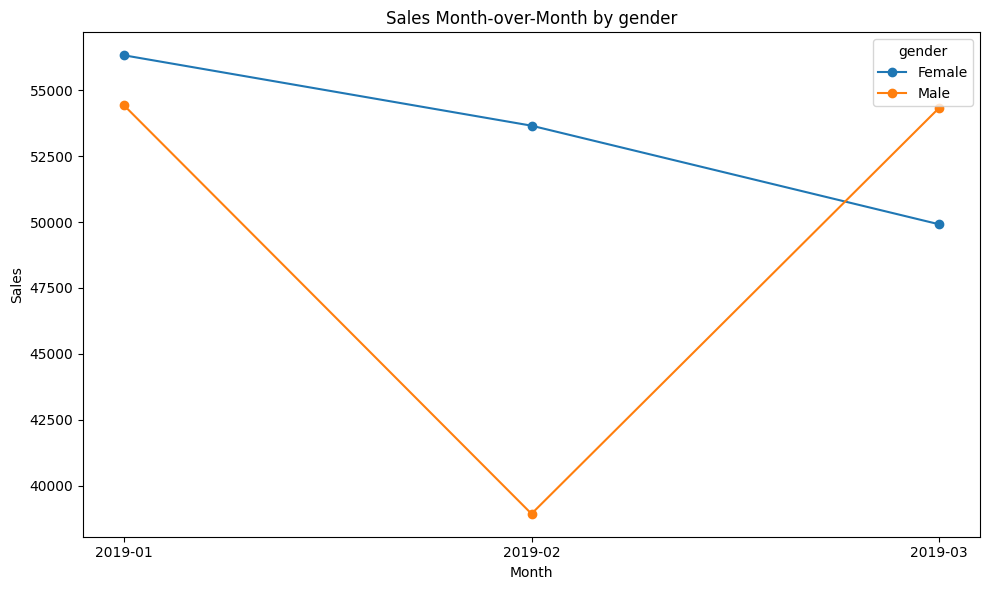

In [36]:
plt.figure(figsize=(10, 6))
for gender in grouped_data_bymonth_gender['Gender'].unique():
    product_sales = grouped_data_bymonth_gender[grouped_data_bymonth_gender['Gender'] == gender]
    plt.plot(product_sales['Month'].astype(str), product_sales['Sales'], label=gender, marker='o')

plt.title('Sales Month-over-Month by gender')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

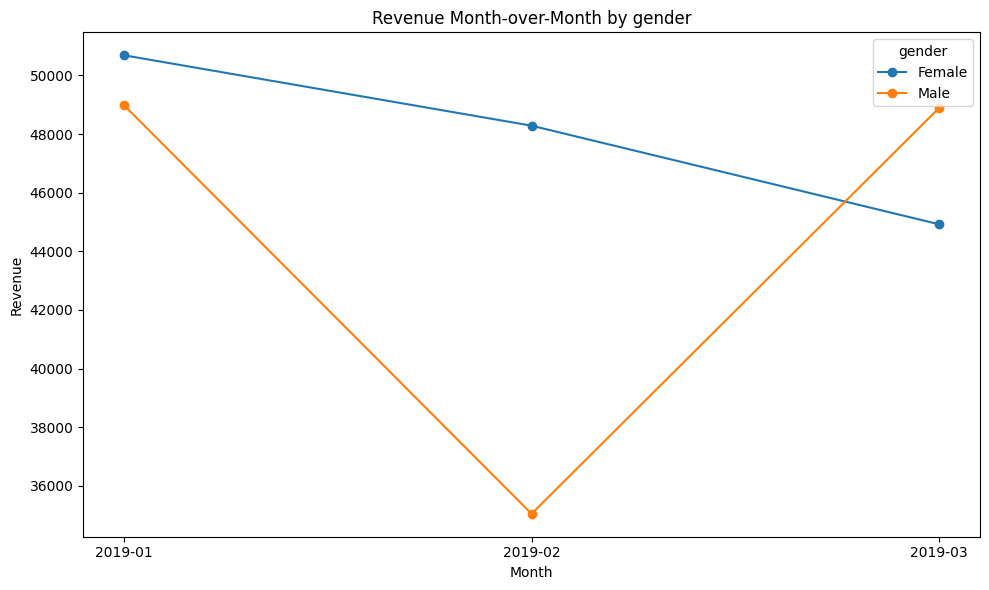

In [37]:
plt.figure(figsize=(10, 6))
for gender in grouped_data_bymonth_gender['Gender'].unique():
    product_revenue = grouped_data_bymonth_gender[grouped_data_bymonth_gender['Gender'] == gender]
    plt.plot(product_revenue['Month'].astype(str), product_revenue['Revenue'], label=gender, marker='o')

plt.title('Revenue Month-over-Month by gender')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend(title='gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [38]:
grouped_data_bymonth_payment = sales_data.groupby(['Month', 'Payment']).agg({'Sales':'sum', 'Revenue':'sum'}).reset_index()
grouped_data_bymonth_payment

,Month,Payment,Sales,Revenue
0,2019-01,Cash,39781.03,35802.927
1,2019-01,Credit card,36425.31,32782.779
2,2019-01,Ewallet,34547.82,31093.038
3,2019-02,Cash,34044.13,30639.717
4,2019-02,Credit card,29866.69,26880.021
5,2019-02,Ewallet,28679.06,25811.154
6,2019-03,Cash,33038.24,29734.416
7,2019-03,Credit card,29676.64,26708.976
8,2019-03,Ewallet,41528.46,37375.614


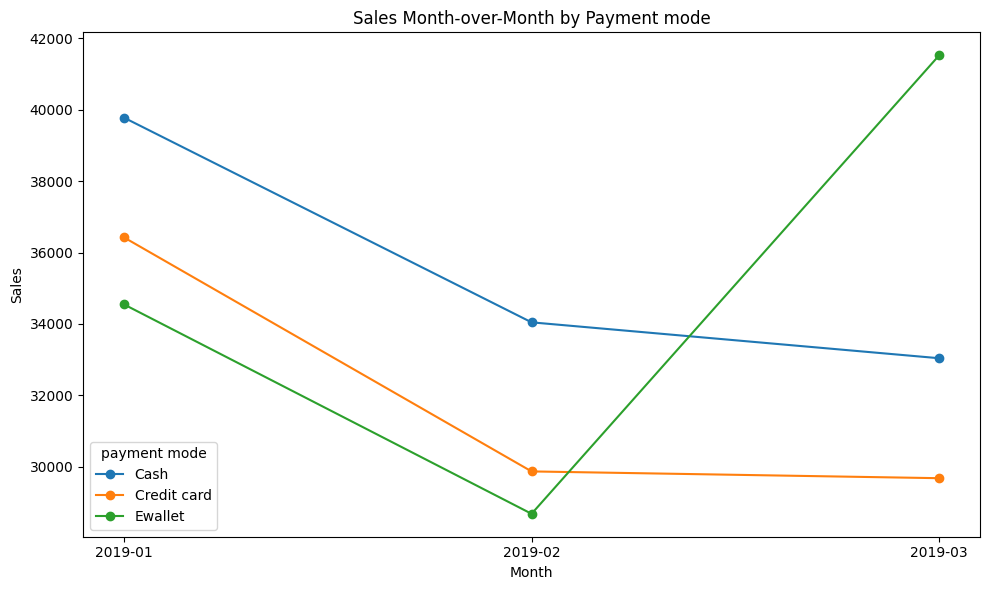

In [39]:
plt.figure(figsize=(10, 6))
for payment in grouped_data_bymonth_payment['Payment'].unique():
    product_sales = grouped_data_bymonth_payment[grouped_data_bymonth_payment['Payment'] == payment]
    plt.plot(product_sales['Month'].astype(str), product_sales['Sales'], label=payment, marker='o')

plt.title('Sales Month-over-Month by Payment mode')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='payment mode')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

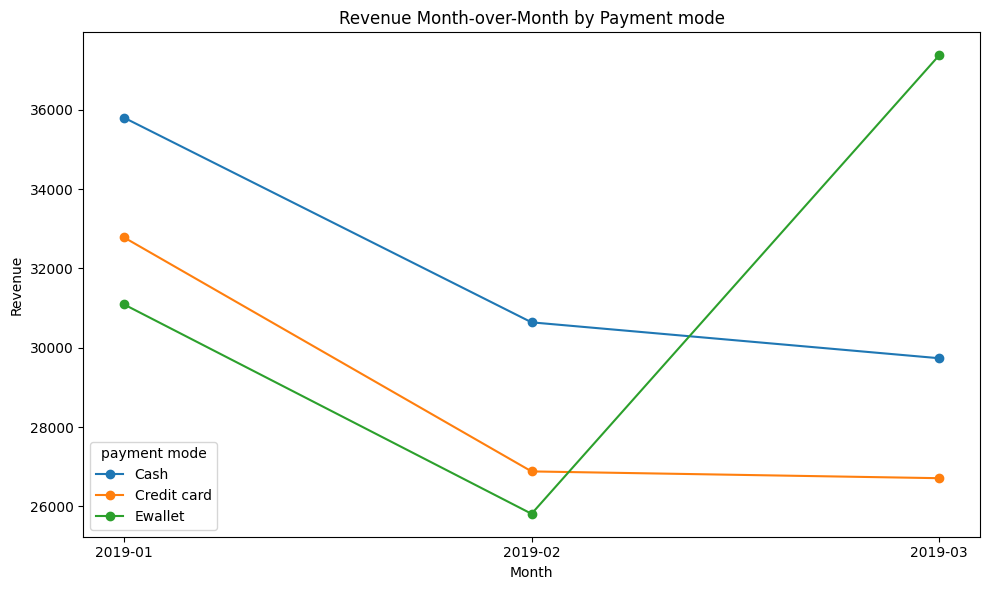

In [33]:
plt.figure(figsize=(10, 6))
for payment in grouped_data_bymonth_payment['Payment'].unique():
    product_revenue = grouped_data_bymonth_payment[grouped_data_bymonth_payment['Payment'] == payment]
    plt.plot(product_revenue['Month'].astype(str), product_revenue['Revenue'], label=payment, marker='o')

plt.title('Revenue Month-over-Month by Payment mode')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend(title='payment mode')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Key Areas to Focus on to get better sales in April 2019**

In [44]:
# Filter data from January to March 2019
jan_march_data = grouped_data_bymonth_productline[
    (grouped_data_bymonth_productline['Month'] >= '2019-01') &
    (grouped_data_bymonth_productline['Month'] <= '2019-03')
]

# Group sales data by Product Line and Gender to analyze trends
trend_data = jan_march_data.groupby(['Product line']).agg({'Sales':'sum'}).reset_index()

# Calculate Month-over-Month percentage change to identify product lines with declining sales
jan_march_data['Previous Month Sales'] = jan_march_data.groupby(['Product line'])['Sales'].shift(1)
jan_march_data['Sales Growth (%)'] = ((jan_march_data['Sales'] - jan_march_data['Previous Month Sales']) / jan_march_data['Previous Month Sales']) * 100

# Identify product lines and gender with declining sales
declining_sales = jan_march_data[jan_march_data['Sales Growth (%)'] < 0]

declining_sales['Sales Growth (%)'] = declining_sales['Sales Growth (%)'].round(2)

# Sort the data by the highest sales decline for better insights
declining_sales_sorted = declining_sales.sort_values(by='Sales Growth (%)')

# Display the formatted and sorted data
print("Product lines and segments with declining sales from January to March:")
print(declining_sales_sorted[['Month', 'Product line', 'Sales Growth (%)']])

Product lines and segments with declining sales from January to March:
      Month            Product line  Sales Growth (%)
10  2019-02      Home and lifestyle            -39.33
11  2019-02       Sports and travel            -36.26
14  2019-03      Food and beverages            -17.13
13  2019-03     Fashion accessories            -16.09
9   2019-02       Health and beauty            -10.87
6   2019-02  Electronic accessories             -7.80
7   2019-02     Fashion accessories             -1.73


<ipython-input-44-012134000ac1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  declining_sales['Sales Growth (%)'] = declining_sales['Sales Growth (%)'].round(2)


# Inferences Drawn to improve sales in April 2019



**Insights:-**

1. Both February and March had declines in Fashion Accessories, indicating it's a persistent issue that should be addressed

2. The Home and Lifestyle segmeent had the largest frop, suggesting that immediate action is needed in April

**Causes:-**

1. The sharp decline could be due to products not being seen as relevant by customers in these months specifically

2. The target customer segments might not be recieving enough attention from marketing campaigns

3. There might be increased competition in these product lines causing sales to drop

**Actions for April:-**

1. Run promotions and discounts for product lines with declining sales

2. Use targeted ads for customer segments that showed sales declines

3. Create bundle offers with high performing and low performing products to increase overall sales
